In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [165]:
#install nltk, wordcloud first
#import nltk
#nltk.download('punkt')

In [166]:
newsData = pd.read_csv('Combined_News_DJIA.csv')
(newsData.head())

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [167]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [168]:
newsData.iloc[0,2]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [169]:
#remove all non-alphabetic char from headlines.
df = newsData.copy()
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
for i in df.columns:
    if i=='Date':
        continue
    if i=='Label':
        continue
    df[i] = df[i].str.lower()
df['Date'] = newsData['Date']

In [170]:
df.replace("^b ","",regex=True, inplace=True)
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,georgia downs two russian warplanes as count...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital o...,afghan children raped with impunity u n of...,russian tanks have entered south ossetia w...,breaking georgia invades south ossetia russi...,the enemy combatent trials are nothing but a...,...,georgia invades south ossetia if russia gets...,al qaeda faces islamist backlash,condoleezza rice the us would not act to pre...,this is a busy day the european union has ap...,georgia will withdraw soldiers from iraq...,why the pentagon thinks attacking iran is a ba...,caucasus in crisis georgia invades south osse...,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses banne...,no help for mexico s kidnapping surge
1,2008-08-11,1,why wont america and nato help us if they won...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tr...,georgian army flees in disarray as russians ad...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeala...,russia angered by israeli military sale to geo...,an american citizen living in s ossetia blames...,...,israel and the us behind the georgian aggressi...,do not believe tv neither russian nor georgi...,riots are still going on in montreal canada ...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states over...,perhaps the question about the georgia rus...,russia is so much better at war,so this is what it s come to trading sex for ...
2,2008-08-12,0,remember that adorable year old who sang at ...,russia ends georgia operation,if we had no sexual harassment we would have ...,al qa eda is losing support in iraq because of...,ceasefire in georgia putin outmaneuvers the w...,why microsoft and intel tried to kill the xo ...,stratfor the russo georgian war and the balan...,i m trying to get a sense of this whole georgi...,...,u s troops still in georgia did you know the...,why russias response to georgia was right,gorbachev accuses u s of making a serious bl...,russia georgia and nato cold war two,remember that adorable year old who led you...,war in georgia the israeli connection,all signs point to the us encouraging georgia ...,christopher king argues that the us and nato a...,america the new mexico,bbc news asia pacific extinction by man n...
3,2008-08-13,0,u s refuses israel weapons to attack iran r...,when the president ordered to attack tskhinval...,israel clears troops who killed reuters camer...,britain s policy of being tough on drugs is ...,body of year old found in trunk latest ra...,china has moved million quake survivors i...,bush announces operation get all up in russia ...,russian forces sink georgian ships,...,elephants extinct by,us humanitarian missions soon in georgia if ...,georgia s ddos came from us sources,russian convoy heads into georgia violating t...,israeli defence minister us against strike on...,gorbachev we had no choice,witness russian forces head towards tbilisi i...,quarter of russians blame u s for conflict ...,georgian president says us military will take...,nobel laureate aleksander solzhenitsyn a...
4,2008-08-14,1,all the experts admit that we should legalise ...,war in south osetia pictures made by a ru...,swedish wrestler ara abrahamian throws away me...,russia exaggerated the death toll in south oss...,missile that killed inside pakistan may have...,rushdie condemns random house s refusal to pub...,poland and us agree to missle defense deal in...,will the russians conquer tblisi bet on it n...,...,bank analyst forecast georgian crisis days e...,georgia confict could set back russia s us rel...,war in the caucasus is as much the product of ...,non media photo

In [171]:
#remove NA and replace with empty string
df.fillna(' ', inplace=True)
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [172]:
def mergeCol(row):
    return ' '.join(row['Top1':'Top25'])
df['headlines'] = df.apply(mergeCol, axis = 1)

In [173]:
#Tokenizing
tokenized_text = df['headlines'].apply(lambda x: x.split())
tokenized_text.head()

0    [georgia, downs, two, russian, warplanes, as, ...
1    [why, wont, america, and, nato, help, us, if, ...
2    [remember, that, adorable, year, old, who, san...
3    [u, s, refuses, israel, weapons, to, attack, i...
4    [all, the, experts, admit, that, we, should, l...
Name: headlines, dtype: object

In [174]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

#Stemming
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i)
                                                  for i in x])

In [175]:
for i in range (len(tokenized_text)):
    tokenized_text[i] = ' '.join(tokenized_text[i])
df['tidy_text'] = tokenized_text

(array([ 20.,  78., 202., 398., 513., 458., 228.,  77.,  10.,   5.]),
 array([1423. , 1718.1, 2013.2, 2308.3, 2603.4, 2898.5, 3193.6, 3488.7,
        3783.8, 4078.9, 4374. ]),
 <BarContainer object of 10 artists>)

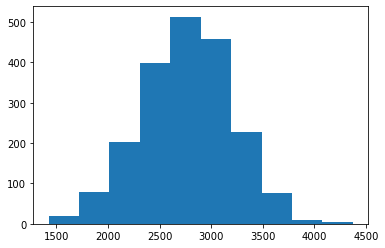

In [176]:
plt.hist(df['headlines'].apply(lambda s:len(s)))

Text(0.5, 0, 'Data Point#')

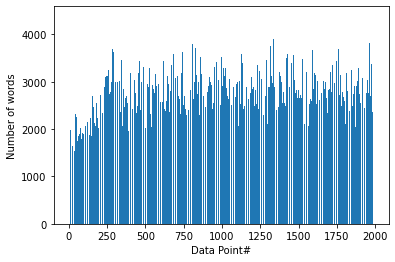

In [177]:
plt.bar(df['headlines'].index, df['headlines'].apply(lambda s:len(s)))
plt.ylabel('Number of words')
plt.xlabel('Data Point#')

Let’s visualize all the words our data using the wordcloud where the size of text is propotional to frequency.

In [184]:
# #News when stock is down for headlines.
# from wordcloud import WordCloud
# all_words = ' '.join([text for text in df['headlines'][df['Label']==0]])
# wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
# plt.figure(figsize=(10,7))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

Text(0.5, 1.0, 'News when stock is up')

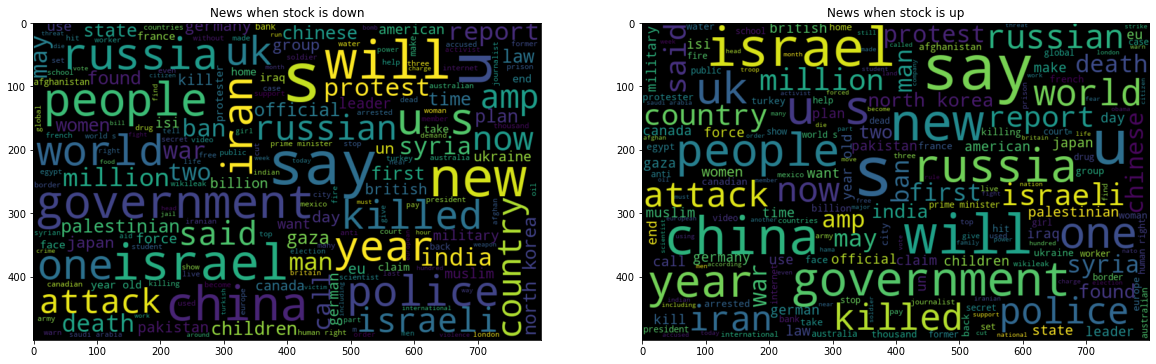

In [183]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
all_words = ' '.join([text for text in df['headlines'][df['Label']==0]])
wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].set_title('News when stock is down')
all_words = ' '.join([text for text in df['headlines'][df['Label']==1]])
wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].set_title('News when stock is up')

We dont see very difference or meaningful words. Let's plot tidy_text

Text(0.5, 1.0, 'News when stock is up')

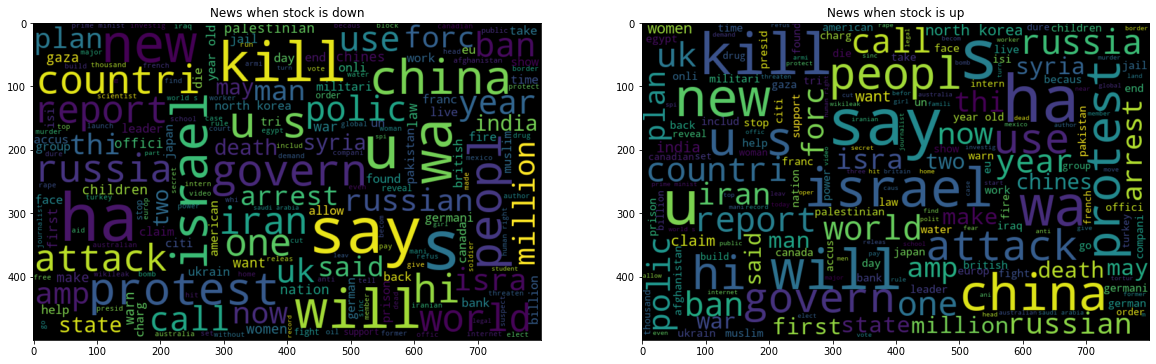

In [185]:
fig, ax = plt.subplots(1,2, figsize = (20,7))
all_words = ' '.join([text for text in df['tidy_text'][df['Label']==0]])
wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].set_title('News when stock is down');
all_words = ' '.join([text for text in df['tidy_text'][df['Label']==1]])
wordcloud = WordCloud(width=800, height = 500, max_font_size=110).generate(all_words)
ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].set_title('News when stock is up');

The tidy text (after stemming) does appear to make more sense

In [192]:
all_words = ' '.join([text for text in df['headlines']])
print(f'Total unique words in headline are {len(set(all_words.split()))}')

all_words = ' '.join([text for text in df['tidy_text']])
print(f'Total unique words in tidy text are {len(set(all_words.split()))}')

Total unique words in headline are 33270
Total unique words in tidy text are 21809


We see almost 10000 reduction in words

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [224]:
#Vectorized the corpus on the whole data. Using unigram does not make sense, we can test bigrams or higher for better accuracy. Taking maximum features.

countvector=CountVectorizer(ngram_range=(2,2),max_features=10000, stop_words = 'english') #todo play with max_feature and ngram
countvector.fit(df['headlines'])

CountVectorizer(max_features=10000, ngram_range=(2, 2), stop_words='english')

In [225]:
#Seperate the test and train data
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [226]:
#convert the data
X_train = countvector.transform(train['headlines'])
X_test = countvector.transform(test['headlines'])

In [227]:
from sklearn.model_selection import GridSearchCV

In [228]:
rf = RandomForestClassifier(criterion='entropy', random_state= 34)

In [229]:
clf = GridSearchCV(rf,{'n_estimators': np.arange(70,261,20)}, cv=5, scoring='roc_auc', verbose=3)
clf.fit(X_train,train['Label'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=70 .................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ..................... n_estimators=70, score=0.491, total=   0.7s
[CV] n_estimators=70 .................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[CV] ..................... n_estimators=70, score=0.512, total=   0.7s
[CV] n_estimators=70 .................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[CV] ..................... n_estimators=70, score=0.495, total=   0.8s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.507, total=   0.9s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.553, to

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=34),
             param_grid={'n_estimators': array([ 70,  90, 110, 130, 150, 170, 190, 210, 230, 250])},
             scoring='roc_auc', verbose=3)

In [230]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.803438,0.094746,0.018440,0.005435,70,{'n_estimators': 70},0.490859,0.511913,0.494932,0.507044,0.553011,0.511552,0.022107,3
1,1.130665,0.133366,0.022860,0.003274,90,{'n_estimators': 90},0.484361,0.506224,0.502383,0.491591,0.567694,0.510451,0.029652,4
2,1.361393,0.161556,0.030894,0.004511,110,{'n_estimators': 110},0.493979,0.504274,0.501242,0.500261,0.564107,0.512773,0.025885,2
3,1.403934,0.099505,0.032956,0.001176,130,{'n_estimators': 130},0.494094,0.505848,0.496751,0.503326,0.569379,0.513880,0.028075,1
4,1.564271,0.151350,0.034527,0.002983,150,{'n_estimators': 150},0.489531,0.502484,0.494282,0.490487,0.561536,0.507664,0.027320,7
5,1.826094,0.307293,0.043828,0.003146,170,{'n_estimators': 170},0.486051,0.507206,0.491928,0.493363,0.560055,0.507720,0.027071,5
6,2.295042,0.229837,0.053535,0.008836,190,{'n_estimators': 190},0.486888,0.503682,0.498975,0.485026,0.563932,0.507701,0.028988,6
7,2.554303,0.267231,0.061855,0.012890,210,{'n_estimators': 210},0.490542,0.502007,0.496765,0.485172,0.559183,0.506734,0.026832,8
8,2.858241,0.156684,0.061772,0.007531,230,{'n_estimators': 230},0.485589,0.499856,0.494744,0.487510,0.558588,0.505257,0.027150,9
9,3.287305,0.404817,0.089212,0.021466,250,{'n_estimators': 250},0.489791,0.495711,0.491683,0.490429,0.556308,0.504784,0.025844,10


Text(0.5, 1.0, 'Cross Validation Plot')

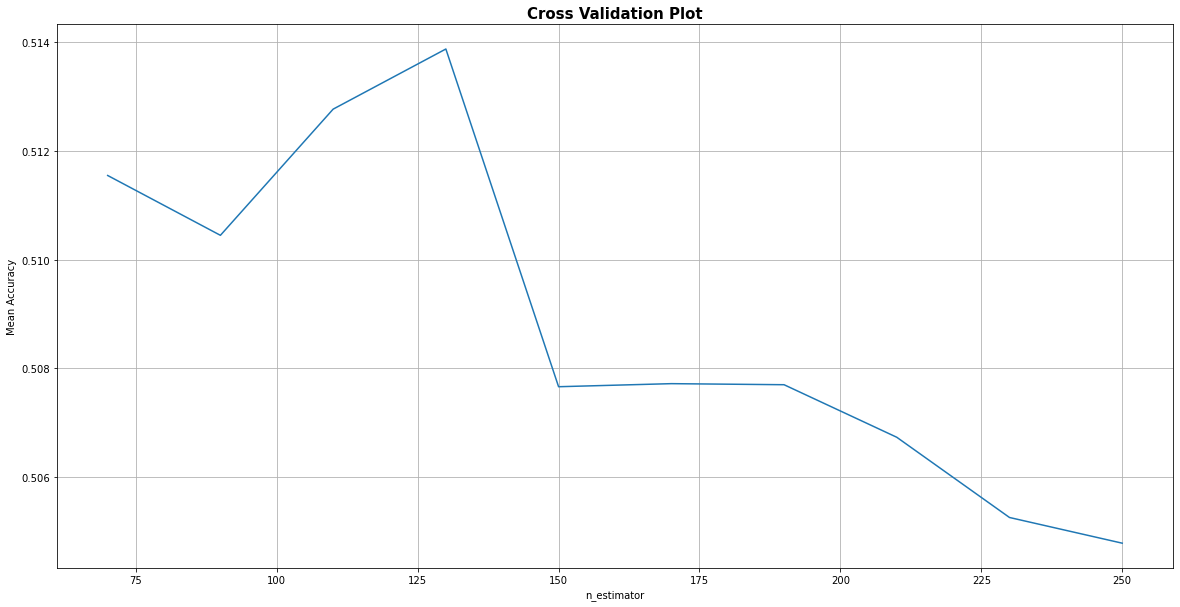

In [231]:
plt.figure(figsize=(20,10))
plt.plot(clf.cv_results_['param_n_estimators'], clf.cv_results_['mean_test_score'])
plt.grid()
plt.xlabel('n_estimator')
plt.ylabel('Mean Accuracy')
plt.title('Cross Validation Plot', size=15, weight='bold')
#plt.xticks(np.arange(0,0.2,0.01));

In [232]:
#We dont see much change as we increase the trees but lets pick the best one.
yx = clf.best_estimator_.predict(X_test)

In [233]:
confusion_matrix(test['Label'], yx)

array([[145,  41],
       [ 21, 171]], dtype=int64)

In [234]:
print(classification_report(test['Label'], yx))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       186
           1       0.81      0.89      0.85       192

    accuracy                           0.84       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.84      0.84      0.84       378



In [211]:
#The accuracy is 88% which is nice.

In [251]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df= 2,
                                  max_features=5000, stop_words='english')
#tfidf_vectorizer.fit(df['tidy_text'])
tfidf = tfidf_vectorizer.fit_transform(df['tidy_text'])
#tfidf.shape

In [252]:
#convert the data
test_index = df['Date']> '20141231'
train_index = df['Date']< '20150101'
# tX_train = tfidf_vectorizer.transform(train['tidy_text'])
# tX_test = tfidf_vectorizer.transform(test['tidy_text'])
tX_train = tfidf[train_index,:]
tX_test = tfidf[test_index,:]

In [253]:
rf2 = RandomForestClassifier(criterion='entropy', random_state= 34, n_estimators=200)
rf2.fit(tX_train, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=34)

In [254]:
y_test_pred2 = rf2.predict(tX_test)
confusion_matrix(test['Label'], y_test_pred2)

array([[146,  40],
       [ 12, 180]], dtype=int64)

In [109]:
#slightly better

In [257]:
# Naive Bayes

In [258]:
def word_feats(words):
    return dict([(word, True) for word in word_tokenize(words)])

In [269]:
featuresets = [(word_feats(f[1]), f[0]) for f in df[['Label', 'tidy_text']].values]

In [270]:
classifier = nltk.NaiveBayesClassifier.train(featuresets[:1610])

In [271]:
acc=nltk.classify.accuracy(classifier, featuresets[1611:])
acc

0.4894179894179894

In [268]:
print(classifier.classify(featuresets[0][0]))

0


In [263]:
#list(test_index.index[test_index==True])

In [264]:
classifier.show_most_informative_features()

Most Informative Features
                  hormuz = True                0 : 1      =      8.3 : 1.0
                    bali = True                0 : 1      =      6.7 : 1.0
                    cape = True                0 : 1      =      6.7 : 1.0
                mosquito = True                0 : 1      =      6.7 : 1.0
                  airway = True                0 : 1      =      5.9 : 1.0
                  franoi = True                0 : 1      =      5.9 : 1.0
                   hoard = True                0 : 1      =      5.9 : 1.0
                     ted = True                0 : 1      =      5.9 : 1.0
                  dublin = True                1 : 0      =      5.6 : 1.0
                   baton = True                1 : 0      =      5.3 : 1.0
